<a href="https://colab.research.google.com/github/siddhantsawhney327/6thSem-ML-Lab/blob/main/1BM23CS327_Lab_3_Logistic_Regression_Binary_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employee Retention Count:
left
0    11428
1     3571
Name: count, dtype: int64


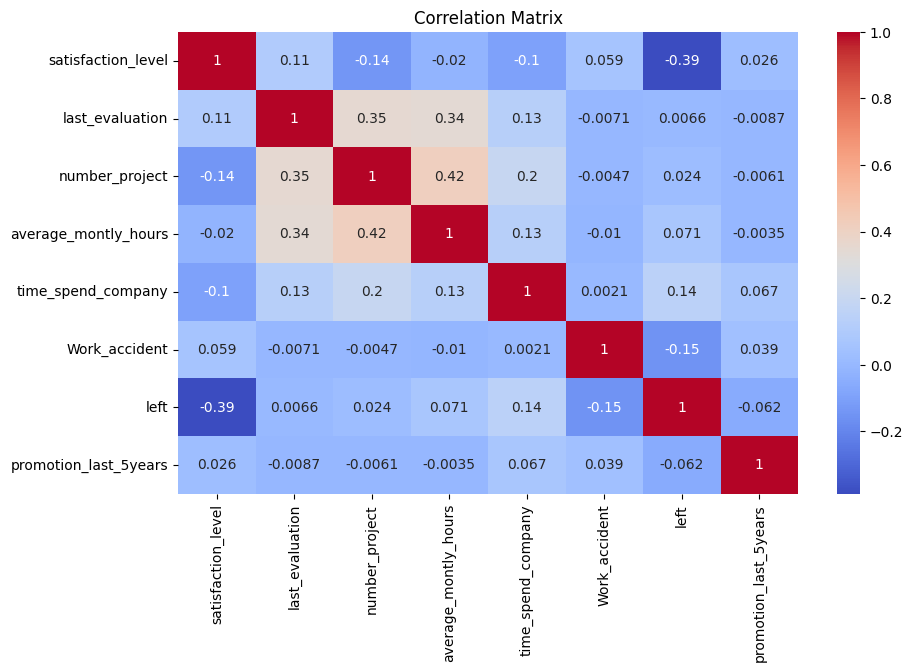

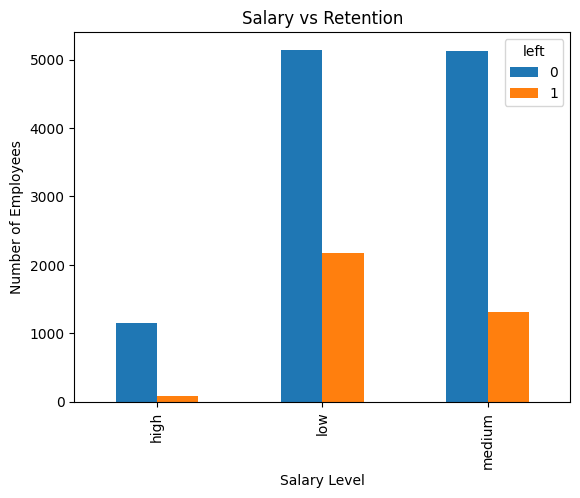

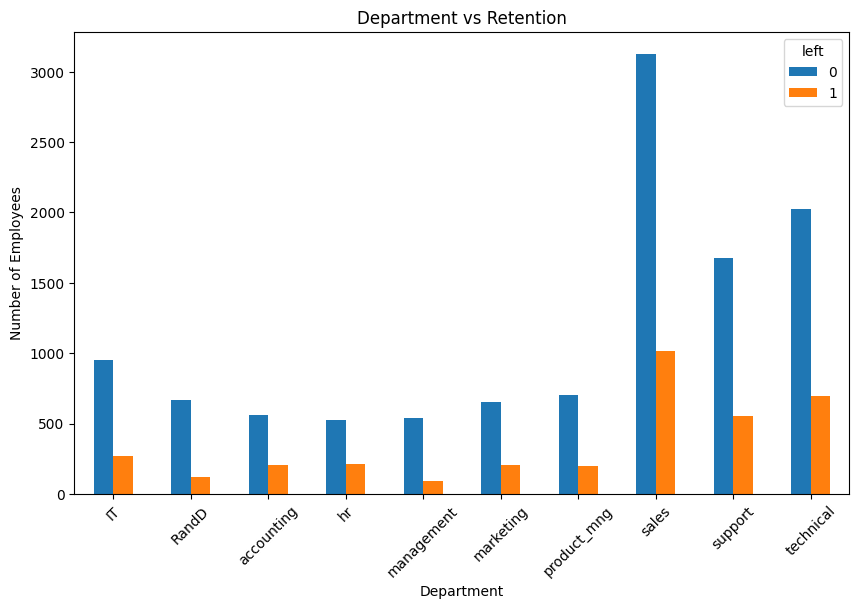


Model Accuracy: 0.765

Confusion Matrix:
[[2132  162]
 [ 543  163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.50      0.23      0.32       706

    accuracy                           0.77      3000
   macro avg       0.65      0.58      0.59      3000
weighted avg       0.73      0.77      0.73      3000



In [1]:
# ======================================
# 1. Import Libraries
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ======================================
# 2. Load Dataset
# ======================================

df = pd.read_csv("HR_comma_sep.csv")

print("Employee Retention Count:")
print(df['left'].value_counts())


# ======================================
# 3. Correlation Matrix (Numeric Only)
# ======================================

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# ======================================
# 4. Salary vs Retention
# ======================================

salary_retention = pd.crosstab(df['salary'], df['left'])

salary_retention.plot(kind='bar')
plt.title("Salary vs Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.show()


# ======================================
# 5. Department vs Retention
# ======================================

dept_retention = pd.crosstab(df['Department'], df['left'])

dept_retention.plot(kind='bar', figsize=(10,6))
plt.title("Department vs Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()


# ======================================
# 6. Feature Selection
# ======================================

selected_features = [
    'satisfaction_level',
    'average_montly_hours',
    'promotion_last_5years',
    'salary',
    'Department'
]

df_selected = df[selected_features + ['left']]


# ======================================
# 7. Convert Categorical Variables
# ======================================

df_selected = pd.get_dummies(df_selected, columns=['salary', 'Department'], drop_first=True)

X = df_selected.drop('left', axis=1)
y = df_selected['left']


# ======================================
# 8. Train-Test Split
# ======================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ======================================
# 9. Logistic Regression Model
# ======================================

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# ======================================
# 10. Model Evaluation
# ======================================

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))